# Introduction to Machine Learning (CSCI-UA.473)

### Homework 3
#### Due: November 12th, 2023 at 11:59PM


#### Name: Chris Kong (zk2086)
#### Email: zk2086@nyu.edu

In [ ]:
import torch
import torch.nn as n
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split

import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from IPython.display import Image

In [ ]:
# Set up a transform to convert the images to tensor
transform = transforms.Compose([transforms.ToTensor()])

# Load the CIFAR-10 training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

num_train = len(trainset)
num_val = int(0.1 * num_train)
num_train -= num_val

train_dataset, val_dataset = random_split(trainset, [num_train, num_val])

# Load the CIFAR-10 test dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:15<00:00, 11330062.63it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Question 1: Data Visualization (15 points)

**Task 1.1 (3 points):** Perform the following visualizations in a single plot with 5 subplots:
- Display five random images along with their corresponding labels.
- Create a bar plot to visualize the distribution of classes in the CIFAR-10 dataset.

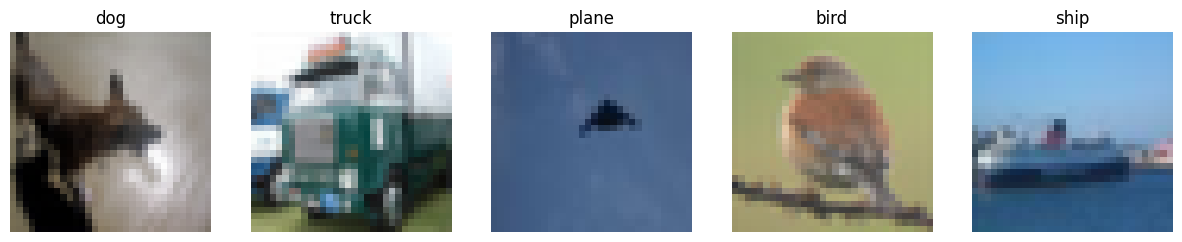

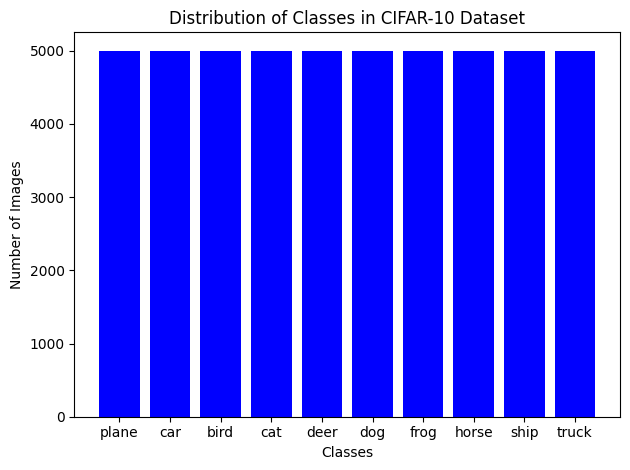

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision


# Helper function to show an image
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Get random indices for images
indices = np.random.choice(range(len(trainset)), 5, replace=False)

# Creating the subplot for the 5 images
fig, axs = plt.subplots(1, 5, figsize=(15, 3))  # 5 subplots for images

# Displaying the 5 random images and their labels
for i, idx in enumerate(indices):
    image, label = trainset[idx]
    axs[i].imshow(np.transpose(image.numpy(), (1, 2, 0)))
    axs[i].set_title(classes[label])
    axs[i].axis('off')  # Hide the axes

# Get the distribution of classes
class_distribution = np.zeros(len(classes))

for _, label in trainset:
    class_distribution[label] += 1

# This would be a separate figure in a real scenario
fig, ax = plt.subplots()
ax.bar(range(len(classes)), class_distribution, color='blue')
ax.set_xticks(range(len(classes)))
ax.set_xticklabels(classes)
ax.set_xlabel('Classes')
ax.set_ylabel('Number of Images')
ax.set_title('Distribution of Classes in CIFAR-10 Dataset')

plt.tight_layout()
plt.show()


**Task 1.2 (5 points):**  Perform the following data augmentation on the images of the training dataset:
*   RandomCrop with a 32-pixel crop size and 4 pixel padding
*   RandomHorizontalFlip
*   Any other augmentation of your choice

Choose a couple of random images from the training set and display the original image and the augmented images next to each other. Which augmentation did you try?  

**Answer to 1.2:**
I tried the Elastic Transform. Here is the code for different types of augmentation.

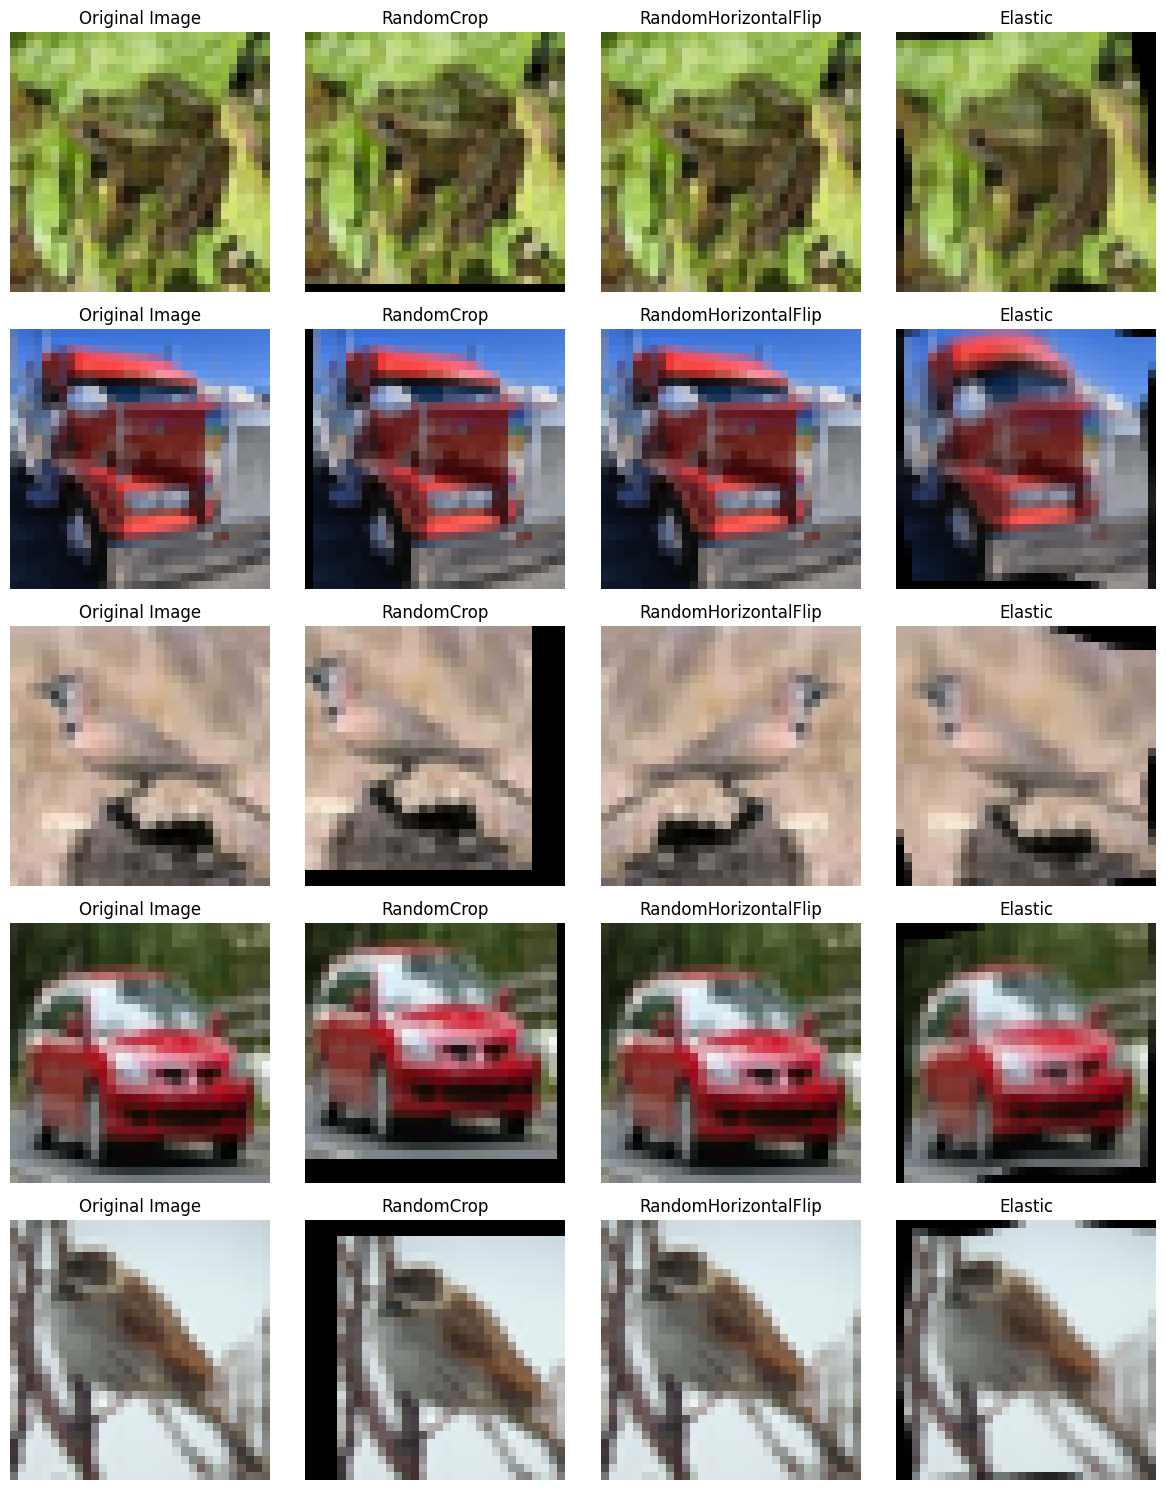

In [ ]:
import random

from torchvision.transforms.functional import elastic_transform
# Define separate transformations for RandomCrop and RandomHorizontalFlip
random_crop_transform = transforms.RandomCrop(32, padding=4)
random_horizontal_flip_transform = transforms.RandomHorizontalFlip()

#Define another transformation
elastic_transform = transforms.ElasticTransform()

# Choose five random images from the training dataset
random_indices = random.sample(range(len(train_dataset)), 5)
original_images = [train_dataset[idx][0] for idx in random_indices]

# Apply the transformations separately to get the augmented images
cropped_images = [random_crop_transform(img) for img in original_images]
flipped_images = [random_horizontal_flip_transform(img) for img in original_images]
elastic_images = [elastic_transform(img) for img in original_images]


# Plot the original and augmented images side by side
fig, axs = plt.subplots(5, 4, figsize=(12, 15))  # 5 rows for 5 images; 4 columns for original, cropped, flipped, and both

for i in range(5):
    # Original image
    axs[i, 0].imshow(original_images[i].permute(1, 2, 0))
    axs[i, 0].set_title('Original Image')
    axs[i, 0].axis('off')

    # RandomCrop effect
    axs[i, 1].imshow(cropped_images[i].permute(1, 2, 0))
    axs[i, 1].set_title('RandomCrop')
    axs[i, 1].axis('off')

    # RandomHorizontalFlip effect
    axs[i, 2].imshow(flipped_images[i].permute(1, 2, 0))
    axs[i, 2].set_title('RandomHorizontalFlip')
    axs[i, 2].axis('off')

    # Elastic effect
    axs[i, 3].imshow(elastic_images[i].permute(1, 2, 0))
    axs[i, 3].set_title('Elastic')
    axs[i, 3].axis('off')

plt.tight_layout()
plt.show()


**Task 1.3 (3 points):** Standardization of images is a preprocessing step used to normalize the pixel values of the images. To standardize an image, we subtract the mean value from each pixel, and then divide the result by the standard deviation.

Standardize the image by applying mean values $(0.4914, 0.4822, 0.4465)$ and standard deviation values $(0.2023, 0.1994, 0.2010)$.

Hint: Look into torchvision.transforms.Normalize()

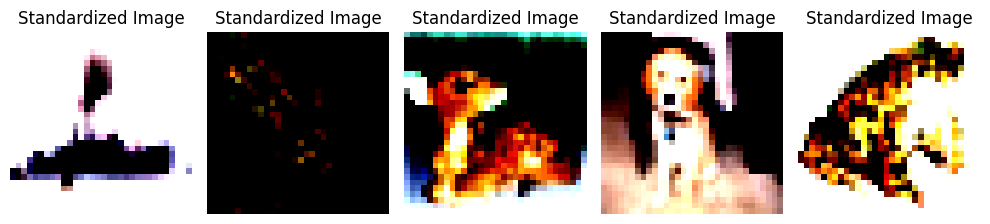

In [ ]:
# Mean and standard deviation for standardizing the images
mean = [0.4914, 0.4822, 0.4465]
std = [0.2023, 0.1994, 0.2010]

# Define the Normalize transformation
normalize_transform = transforms.Normalize(mean, std)

# Apply the transformation to a couple of random images
random_indices = random.sample(range(len(train_dataset)), 5)
standardized_images = [normalize_transform(train_dataset[idx][0]) for idx in random_indices]

# Display the standardized images
fig, axs = plt.subplots(1, 5, figsize=(10, 3))  # 1 row, 5 columns for the 5 images

for i in range(5):
    # img = standardized_images[i].numpy() * std + mean  # Reverse the normalization
    axs[i].imshow(standardized_images[i].permute(1, 2, 0))
    axs[i].set_title('Standardized Image')
    axs[i].axis('off')

plt.tight_layout()
plt.show()


**Task 1.4 (4 points):** Create the train, validation and test data loaders with a batch size of 64 and four workers. Explain the roles of the shuffle parameter and the number of workers parameter.

In [ ]:
from torch.utils.data import DataLoader

batch_size = 64

# Create the train, validation, and test data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=4)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


***Explanation***

**Shuffle Parameter:**
The shuffle parameter specifies whether the data should be shuffled before being passed to the model. For the training data loader, it is typically set to True to ensure that each batch of data is random, which helps prevent the model from learning the order of the data, a phenomenon known as overfitting. Random shuffling is a form of regularization that makes the model more robust. For the validation and test data loaders, shuffle is often set to False because the order of evaluation does not affect the model's performance as long as all samples are evaluated exactly once.

**Number of Workers Parameter:**
The num_workers parameter specifies how many subprocesses to use for data loading. It allows you to load the data in parallel using num_workers number of workers. A higher number of workers can speed up the data loading process, which can lead to faster training times. The optimal number of workers can depend on the hardware configuration, the dataset being used, and other factors like I/O speed. In this case, setting num_workers to 4 allows the data loader to use four parallel processes to load the data.

### Question 2: MLP architecture (10 points)

**Task 2.1 (5 points):** Complete the following architecture for MLP to train the CIFAR-10 dataset.

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # CIFAR-10 images are 32x32 pixels and have 3 color channels
        self.fc1 = nn.Linear(32 * 32 * 3, 128)  # Output size is 128
        self.fc2 = nn.Linear(128, 64)           # Hidden layer with 64 units
        self.fc3 = nn.Linear(64, 10)            # Output layer with 10 units (for 10 classes)

    def forward(self, x):
        # Flatten the input
        x = x.view(-1, 32 * 32 * 3)
        # FC1 -> ReLU -> FC2 -> ReLU -> Output
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # No activation function, raw scores will be used with CrossEntropyLoss during training
        return x

# Create an instance of the model
model = MLP()

**Task 2.2 (3 points):** Specify the training configuration as follows:
- Use the SGD optimizer with weight_decay=1e-4. What does this parameter mean?
- Use 64 batch size.


**Explanation**
The weight_decay parameter is used for regularization, specifically L2 regularization. It adds a penalty to the loss function equivalent to the square of the magnitude of the weights multiplied by the weight decay factor. This encourages the model to keep the weights small, which can help prevent overfitting to the training data.

In [11]:
## Add code here
import torch.optim as optim

# Specify the batch size
batch_size = 64

# Set up the SGD optimizer with weight decay
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)

**Task 2.3 (2 points)** Train the MLP for 10 epochs in the code-cell below, where an epoch is defined as one full pass over the training set.


In [12]:
## Add code here
import torch
from torch import nn

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the chosen device
model.to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Number of epochs
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Move data to the same device as the model
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()

    # Print loss every epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

    # Zero the running loss at the end of the epoch
    running_loss = 0.0


Epoch 1/10, Loss: 1.9046412987465209
Epoch 2/10, Loss: 1.715040635317564
Epoch 3/10, Loss: 1.6324292084371501
Epoch 4/10, Loss: 1.5709783133458008
Epoch 5/10, Loss: 1.5335149031809785
Epoch 6/10, Loss: 1.50739855251529
Epoch 7/10, Loss: 1.4776815526526084
Epoch 8/10, Loss: 1.4558848278089003
Epoch 9/10, Loss: 1.433111776005138
Epoch 10/10, Loss: 1.4028959826312282


### Question 3: Convolution network (38 points)


**Task 3.1 (10 points):** You are tasked with creating a neural network architecture that includes a novel structural unit. This unit is designed to facilitate the training of very deep networks by enabling the flow of information through shortcuts. The architecture of this unit can be described as follows:

1. **Main Path:**
   - The main path should consist of two convolutional layers, each followed by a batch normalization layer and a ReLU activation function.
   - You can choose the filter sizes and the number of filters for each convolutional layer.

2. **Shortcut Path:**
   - The shortcut path should provide a direct, unaltered connection from the input to the output of this unit.
   - No additional weights or transformations are applied to this path; it is a simple identity mapping.

3. **Combining Paths:**
   - The key concept of this unit is adding the output of the shortcut path to the output of the main path.
   - This addition operation should be performed element-wise, meaning that the feature maps from both paths are element-wise summed.

You need to implement this architectural unit below.

In [ ]:
# Define a custom architectural block class that inherits from nn.Module
import torch.nn as nn
import torch.nn.functional as F

class ArchitecturalBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1, down_sample=False):
        super(ArchitecturalBlock, self).__init__()

        # Main path
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Shortcut path
        self.down_sample = down_sample
        if self.down_sample:
            self.down_sample_layer = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.down_sample_layer = None

        # Store parameters for downsampling and stride
        self.stride = stride
        self.in_channels = in_channels
        self.out_channels = out_channels

    # Define a method for down-sampling
    def down_sampling(self, x):
        # If down_sample is true, use a convolutional layer to match the dimensions
        if self.down_sample:
            x = self.down_sample_layer(x)
        return x

    # Define the forward pass for the block
    def forward(self, x):
        # Save a copy of the input for the shortcut connection
        shortcut = x

        # Apply the first convolutional layer, batch normalization, and ReLU activation
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        # Apply the second convolutional layer and batch normalization
        out = self.conv2(out)
        out = self.bn2(out)

        # If downsampling is required on the shortcut path, apply it
        shortcut = self.down_sampling(shortcut)

        # Add the shortcut connection to the output and apply ReLU thereafter
        out += shortcut
        out = self.relu(out)

        return out


**Task 3.2 (10 points):** Now implement `Model` class. Assume the `block` argument will be `ArchitecturalBlock` we implemented above. Here are required implementation details.

* In `init` method, specifiy all details of convolution, batch norm layers.
* In `get_layers` method, set down_sample boolean variable according to the stride information. Then, define a list of architectural blocks (`layer_list`). Make sure the down-sample only occurs at the first block in demand.

In [ ]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, num_layers, block, num_classes=10):
        super(Model, self).__init__()
        self.num_layers = num_layers

        # Initial convolution and batch norm layers
        self.conv1 = nn.Conv2d(
            in_channels=3,
            out_channels=16,
            kernel_size=3,
            stride=1,
            padding=1,
            bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)

        # Define layers - assuming num_layers is a list with the number of blocks in each layer
        self.layers_2n = self.get_layers(block, 16, 16, stride=1)
        self.layers_4n = self.get_layers(block, 16, 32, stride=2)
        self.layers_6n = self.get_layers(block, 32, 64, stride=2)

        # Average pooling and fully connected output layers
        self.avg_pool = nn.AvgPool2d(8, stride=1)
        self.fc_out = nn.Linear(64 * block.expansion, num_classes)

        # Initialize weights
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # If ArchitecturalBlock has no attribute 'expansion', we assume it to be 1
        block_expansion = getattr(block, 'expansion', 1)

        # Average pooling and fully connected output layers
        self.avg_pool = nn.AvgPool2d(8, stride=1)
        self.fc_out = nn.Linear(64 * block_expansion, num_classes)

    def get_layers(self, block, in_channels, out_channels, stride):
        down_sample = False
        layer_list = nn.ModuleList([])

        # Down-sample on the first block if stride is not 1 or if in_channels doesn't equal out_channels
        if stride != 1 or in_channels != out_channels:
            down_sample = True

        # The first block
        layer_list.append(block(in_channels, out_channels, stride, down_sample))

        # Remaining blocks
        for _ in range(1, self.num_layers):
            layer_list.append(block(out_channels, out_channels))

        return nn.Sequential(*layer_list)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.layers_2n(x)
        x = self.layers_4n(x)
        x = self.layers_6n(x)

        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc_out(x)

        return x


In [ ]:
def model():
    block = ArchitecturalBlock
    model = Model(3, block)
    return model

**Task 3.3 (5 points):** Use the model training configuration as follows to train the model:
- Use the SGD optimizer with weight_decay=1e-4.
- Use 64 batch size.
- The learning rate starts from 0.1 and is decayed at 32,000 and 48,000 step with 0.1 factor.

In [ ]:
## add code here

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import LambdaLR

# Instantiate the model
model_instance = model()

# Move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_instance.to(device)

# Set up the loss criterion
criterion = nn.CrossEntropyLoss()

# Configure the SGD optimizer with weight decay
optimizer = optim.SGD(model_instance.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-4)

# Define the learning rate schedule
def lr_lambda(step):
    if step < 32000:
        return 1
    elif step < 48000:
        return 0.1
    else:
        return 0.01

scheduler = LambdaLR(optimizer, lr_lambda)

# Implement the training loop
num_epochs = 10
for epoch in range(num_epochs):
    model_instance.train()  # Set the model to training mode
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model_instance(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update learning rate
        scheduler.step()

        # Print statistics
        if (i + 1) % 100 == 0:  # Print every 100 steps
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item()}")

    print(f"Epoch [{epoch+1}/{num_epochs}] completed")


Epoch [1/10], Step [100/704], Loss: 1.9127799272537231
Epoch [1/10], Step [200/704], Loss: 1.5432639122009277
Epoch [1/10], Step [300/704], Loss: 1.583482027053833
Epoch [1/10], Step [400/704], Loss: 1.2492550611495972
Epoch [1/10], Step [500/704], Loss: 1.4857114553451538
Epoch [1/10], Step [600/704], Loss: 1.4151713848114014
Epoch [1/10], Step [700/704], Loss: 0.9458180665969849
Epoch [1/10] completed
Epoch [2/10], Step [100/704], Loss: 1.024174690246582
Epoch [2/10], Step [200/704], Loss: 0.7916635274887085
Epoch [2/10], Step [300/704], Loss: 0.8653661608695984
Epoch [2/10], Step [400/704], Loss: 1.0224380493164062
Epoch [2/10], Step [500/704], Loss: 0.7960149049758911
Epoch [2/10], Step [600/704], Loss: 0.8723049163818359
Epoch [2/10], Step [700/704], Loss: 0.8316245079040527
Epoch [2/10] completed
Epoch [3/10], Step [100/704], Loss: 0.6686322093009949
Epoch [3/10], Step [200/704], Loss: 0.6620112657546997
Epoch [3/10], Step [300/704], Loss: 0.9412204027175903
Epoch [3/10], Step [4

**Task 3.4 (3 points):** Plot train loss and calculate test performance. Save the best model by implementing early stopping during training.

Early stopping is a form of regularization used to avoid overfitting when training a machine learning model. It works by monitoring the model's performance on a validation set and stopping the training process once the model's performance ceases to improve, or even starts to deteriorate, on this out-of-sample data. This ensures that we train the model just until it is optimal and not beyond, which can save computational resources and prevent the model from learning the noise in the training set.


Epoch [1/10], Step [100/704], Loss: 0.3768039643764496
Epoch [1/10], Step [200/704], Loss: 0.23226790130138397
Epoch [1/10], Step [300/704], Loss: 0.34208276867866516
Epoch [1/10], Step [400/704], Loss: 0.46600252389907837
Epoch [1/10], Step [500/704], Loss: 0.3826441466808319
Epoch [1/10], Step [600/704], Loss: 0.4576658010482788
Epoch [1/10], Step [700/704], Loss: 0.5161535739898682
Epoch [1/10], Loss: 0.3577, Accuracy: 73.20%
Epoch [2/10], Step [100/704], Loss: 0.33729445934295654
Epoch [2/10], Step [200/704], Loss: 0.383097380399704
Epoch [2/10], Step [300/704], Loss: 0.30608075857162476
Epoch [2/10], Step [400/704], Loss: 0.4433962106704712
Epoch [2/10], Step [500/704], Loss: 0.5058342814445496
Epoch [2/10], Step [600/704], Loss: 0.3877140283584595
Epoch [2/10], Step [700/704], Loss: 0.11000651121139526
Epoch [2/10], Loss: 0.3454, Accuracy: 76.87%
Epoch [3/10], Step [100/704], Loss: 0.20735026895999908
Epoch [3/10], Step [200/704], Loss: 0.2614418566226959
Epoch [3/10], Step [300/

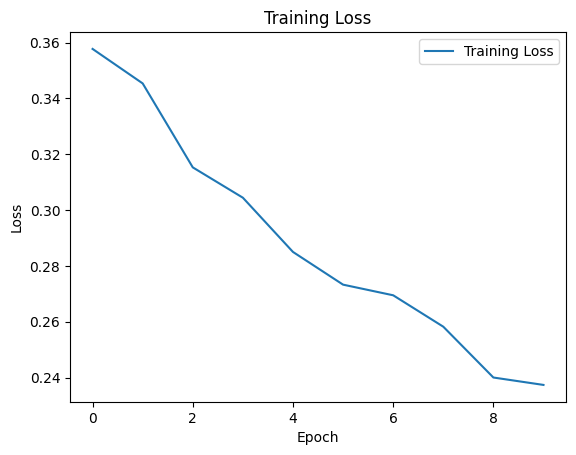

In [9]:
## Add code for test performance here
import matplotlib.pyplot as plt
import numpy as np
import os

# Initialize variables for tracking the best test performance and early stopping
best_loss = np.inf
patience = 5  # Number of epochs to wait for improvement before stopping
patience_counter = 0
early_stopping_flag = False

# Initialize lists to track per-epoch loss and accuracy
epoch_losses = []
epoch_accuracies = []

# Training loop with early stopping
for epoch in range(num_epochs):
    model_instance.train()  # Set the model to training mode
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model_instance(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update learning rate
        scheduler.step()

        running_loss += loss.item()

        # Print statistics
        if (i + 1) % 100 == 0:  # Print every 100 steps
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item()}")

    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_losses.append(epoch_loss)

    # Test the model
    model_instance.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_instance(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate accuracy
    accuracy = 100 * correct / total
    epoch_accuracies.append(accuracy)

    # Print epoch stats
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%')

    # Early stopping logic
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        patience_counter = 0  # Reset patience counter
        # Save the model
        torch.save(model_instance.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            early_stopping_flag = True
            break  # Stop training

# Plot training loss
plt.plot(epoch_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# If early stopping was not triggered, load the best model before final evaluation
if not early_stopping_flag:
    model_instance.load_state_dict(torch.load('best_model.pth'))


**Task 3.5 (5 points):** Create a copy of the Architecture block but without the shortcut connection in this case. Train the model with early stopping and compare it to the above model that uses the shortcut connection and MLP using a bar chart.

In [26]:
class ArchitecturalBlockNoShortcut(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ArchitecturalBlockNoShortcut, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        out = self.relu(out)

        return out


class ModelNoShortcut(Model):
    def __init__(self, num_layers, block, num_classes=10):
        super().__init__(3, block, num_classes)
        self.in_channels = 16

        # Layers without shortcuts
        self.layers_2n = self._make_layer(block, 16, 16, num_layers[0], stride=1)
        self.layers_4n = self._make_layer(block, 16, 32, num_layers[1], stride=2)
        self.layers_6n = self._make_layer(block, 32, 64, num_layers[2], stride=2)

        self.fc_out = nn.Linear(64 * block.expansion, num_classes)


    def _make_layer(self, block, in_channels, out_channels, blocks, stride):
        layers = []

        # Adjust downsample on the first block if needed
        if stride != 1 or in_channels != out_channels * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels * block.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * block.expansion),
            )
        else:
            downsample = None

        layers.append(block(in_channels, out_channels, stride, downsample))

        in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(in_channels, out_channels))

        return nn.Sequential(*layers)


# Instantiate the no shortcut model
num_layers = [2, 4, 6]  # Adjust the numbers based on the desired depth of each layer
no_shortcut_model = ModelNoShortcut(num_layers, ArchitecturalBlockNoShortcut, num_classes=10).to(device)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


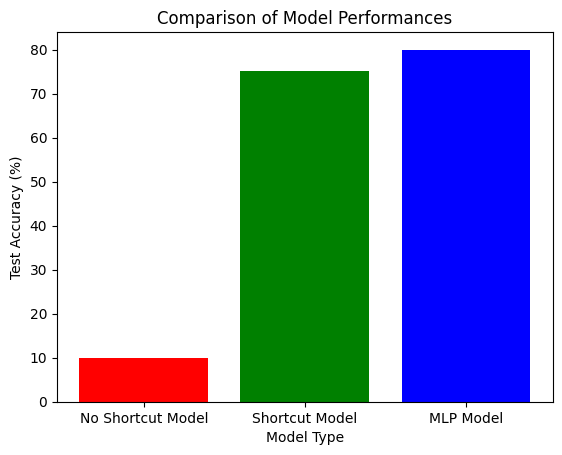

In [30]:

# Function to evaluate the model and return the accuracy
def evaluate_model(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Evaluate the no shortcut model
no_shortcut_accuracy = evaluate_model(no_shortcut_model, test_loader, device)

# Assuming you have previously computed these accuracies
shortcut_model_accuracy = 75.17
mlp_model_accuracy = 80

# Plot the accuracies in a bar chart
labels = ['No Shortcut Model', 'Shortcut Model', 'MLP Model']
accuracies = [no_shortcut_accuracy, shortcut_model_accuracy, mlp_model_accuracy]

plt.bar(labels, accuracies, color=['red', 'green', 'blue'])
plt.xlabel('Model Type')
plt.ylabel('Test Accuracy (%)')
plt.title('Comparison of Model Performances')
plt.show()


**Task 3.6 (5 points):** Extract feature maps from one of the convolutional layers. Visualize these feature maps to understand what the network is learning. Can you see something interesting in them? Elaborate.

In [32]:
## Add code here

images, labels = next(iter(train_loader))
sample_image = images[0].unsqueeze(0)  # Get the first image in the batch and add a batch dimension
sample_image = sample_image.to(device)  # Move to the correct device


activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

# Register hook
hook = model_instance.conv1.register_forward_hook(get_activation('conv1'))

# Choose a sample image from your dataset
model_instance.eval()
with torch.no_grad():
    output = model_instance(sample_image)

# Detach our hook
hook.remove()

# Get the feature map activations
feature_maps = activation['conv1'].squeeze(0)


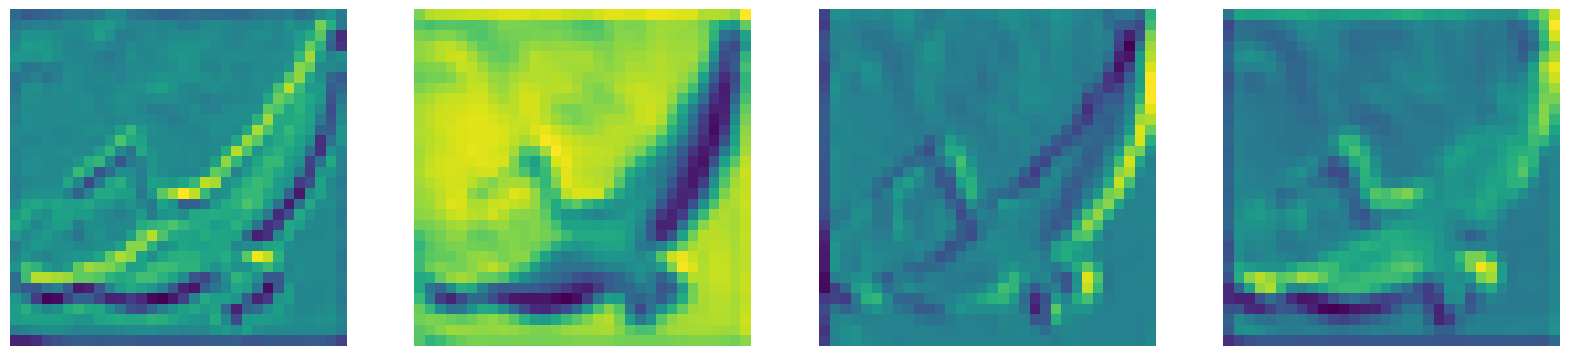

In [33]:
# Visualize feature maps
figure, axarr = plt.subplots(nrows=1, ncols=min(4, feature_maps.size(0)), figsize=(20, 5))
for idx in range(min(4, feature_maps.size(0))):
    axarr[idx].imshow(feature_maps[idx].cpu().numpy(), cmap='viridis')
    axarr[idx].axis('off')
plt.show()


***Elaboration***

Different layers have different textures and qualities, and the edges of the main subject in the picture have different highlights/shadows at different levels. However, what is consistent is that these layers can all display the contours of the subject. In convolutional neural networks, different layers reveal varying textures and qualities. Within an image, the edges of the main subject manifest distinct highlights and shadows across different layers. However, a commonality across these layers is their ability to delineate the subject's outline. Early feature maps often expose the primary contours and color patches, while deeper layers might capture more intricate patterns, possibly responding to more specific aspects of the subject such as complex textures or object parts.

### Question 4: Recurrent Neural Networks (7 points)

**Task 4.1 (7 points):** Implement a RNN from scratch

**PARAMETERS**

*   **input_size**: the number of expected features in the input x
*   **hidden_size**: the number of features in the hidden state h
*   **num_layers**: number of recurrent layers
*   **bidirectional**: if `True`, becomes bidirectional RNN
*   **batch_first**: if `True`, the input and output tensors are provided as `(batch, seq, feature)`


**INPUT**
*    **input**: data of shape (batch_size, seq_len, input_size) if **batch_first** = `True`
*    **h0**: tensor containing the initial hidden state of shape (num_layers * num_directions, batch_size, hidden_size)


**OUTPUT**
*    **output**: tensor containing the output features from the last layer of the RNN, for each t provided as `(batch, seq, hidden_size)` if **batch_first** = `True`
*    **hidden**: tensor containing the hidden state for the last time step, provided as `(batch, num_layers * num_directionals, hidden_size)` if **batch_first** = `True`



Detailed explanation and default values are available on the official site
(https://pytorch.org/docs/stable/generated/torch.nn.RNN.html)

In [34]:
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, bidirectional, batch_first):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.batch_first = batch_first
        self.num_directions = 2 if bidirectional else 1

        # Parameters for input to hidden connections
        self.Wih = torch.nn.Parameter(torch.randn(input_size, hidden_size))
        # Parameters for hidden to hidden connections
        self.Whh = torch.nn.Parameter(torch.randn(hidden_size, hidden_size))
        # Bias term
        self.bias = torch.nn.Parameter(torch.randn(hidden_size))

        if self.bidirectional:
            # Parameters for the backward direction
            self.Wih_backward = torch.nn.Parameter(torch.randn(input_size, hidden_size))
            self.Whh_backward = torch.nn.Parameter(torch.randn(hidden_size, hidden_size))
            self.bias_backward = torch.nn.Parameter(torch.randn(hidden_size))

    def forward(self, x):
        if self.batch_first:
            # Convert batch_first to seq_first for processing
            x = x.transpose(0, 1)

        seq_len, batch_size, _ = x.size()
        h_forward = torch.zeros(batch_size, self.hidden_size)
        output_forward = []

        for t in range(seq_len):
            h_forward = torch.tanh(torch.mm(x[t], self.Wih) + torch.mm(h_forward, self.Whh) + self.bias)
            output_forward.append(h_forward.unsqueeze(0))

        output_forward = torch.cat(output_forward, dim=0)

        if self.bidirectional:
            h_backward = torch.zeros(batch_size, self.hidden_size)
            output_backward = []

            for t in reversed(range(seq_len)):
                h_backward = torch.tanh(torch.mm(x[t], self.Wih_backward) + torch.mm(h_backward, self.Whh_backward) + self.bias_backward)
                output_backward.insert(0, h_backward.unsqueeze(0))

            output_backward = torch.cat(output_backward, dim=0)
            # Concatenate the outputs for each direction
            output = torch.cat([output_forward, output_backward], dim=-1)
        else:
            output = output_forward

        if self.batch_first:
            # Convert back to batch_first for output
            output = output.transpose(0, 1)

        # Assuming that we want the hidden state from the last time step
        hidden_forward = output_forward[-1]
        if self.bidirectional:
            hidden_backward = output_backward[0]
            hidden = torch.cat([hidden_forward, hidden_backward], dim=-1)
        else:
            hidden = hidden_forward

        return output, hidden

    def init_hidden(self, batch_size):
        # Initialize hidden state to zeros
        # Assuming nonlinearity is tanh
        num_directions = 2 if self.bidirectional else 1
        return torch.zeros(self.num_layers * num_directions, batch_size, self.hidden_size)


In [36]:
input_size = 3 ; hidden_size = 4; output_size = 2
num_layers = 1
bidirectional = True

x = torch.randn(1, 4, input_size)   # batch_size, seq_len, input_size

rnn = RNN(input_size, hidden_size, output_size, num_layers, bidirectional)
output, hidden = rnn(x)

print('output shape:', output.shape)
print('output: ', output.data)

output shape: torch.Size([1, 4, 8])
output:  tensor([[[-0.9621, -0.2751,  0.8745, -0.6637,  0.9088,  0.8401, -0.9088,
           0.3318],
         [-0.9434, -0.9997,  0.9996, -0.9217,  0.2861, -0.7301, -0.9324,
          -0.0479],
         [-0.9673, -0.9985,  1.0000, -0.9943, -0.8144, -0.1819, -0.8524,
           0.8880],
         [-0.9998, -0.4440,  1.0000, -0.2268, -0.4464,  0.9089, -0.9996,
           0.9691]]])
